In [1]:
# noinspection JupyterPackage
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from matplotlib.ticker import FuncFormatter
import django
import os
import sys

%matplotlib inline

In [2]:
os.environ["DJANGO_SETTINGS_MODULE"] = "eduQualityEval.settings"
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
sys.path.extend(['/Users/stefan/Documents/eduQualityEval', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pycharm', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev'])
django.setup()

In [4]:
from evaluation_tool.scripts.data_analysis import DataAnalyzer

In [5]:
da = DataAnalyzer("fb69b214-ce2d-4d97-8af3-56bb88c4a59b")
data_dict = da.get_stats_per_dim()

In [6]:
print(data_dict)

{1: {'name': 'Auswahl und Inhalte', 'mean': 3.25, 'std': 1.1, 'median': 3, 'counts': ([1, 2, 3, 4, 5], [7, 19, 26, 36, 11])}, 2: {'name': 'Kognitive Aktivierung', 'mean': 3.43, 'std': 1.09, 'median': 4, 'counts': ([1, 2, 3, 4, 5], [4, 11, 21, 27, 12])}, 3: {'name': 'Üben', 'mean': 3.23, 'std': 1.28, 'median': 4, 'counts': ([1, 2, 3, 4, 5], [7, 7, 9, 18, 7])}, 4: {'name': 'Assessment', 'mean': 3.65, 'std': 1.03, 'median': 4, 'counts': ([1, 2, 3, 4, 5], [2, 7, 11, 26, 11])}, 5: {'name': 'Lernunterstützung', 'mean': 3.19, 'std': 1.13, 'median': 4, 'counts': ([1, 2, 3, 4, 5], [6, 10, 12, 25, 4])}, 6: {'name': 'Sozio-emotionale Unterstützung', 'mean': 3.29, 'std': 1.14, 'median': 3, 'counts': ([1, 2, 3, 4, 5], [2, 13, 13, 14, 9])}, 61: {'name': 'Verhältnis: Lehrer - Schüler', 'mean': 3.5, 'std': 1.12, 'median': 4, 'counts': ([1, 2, 3, 4, 5], [1, 6, 6, 11, 6])}, 62: {'name': 'Verhältnis: Schüler untereinander', 'mean': 3.17, 'std': 1.07, 'median': 3, 'counts': ([1, 2, 3, 4, 5], [0, 6, 6, 3, 

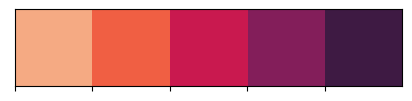

In [7]:
sns.palplot(sns.color_palette("rocket_r", 5))

In [50]:
def create_bullet_graph(counts, dimension_name, mean, sd):
    limits = list(np.array(counts).cumsum())
    rcParams['font.family'] = 'monospace'
    # remove x labels and ticks
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    # clear all existing axis and figures
    plt.cla()
    plt.clf()

    max_limit = max(limits)
    limits_in_percentage = [round(limit / max_limit * 100, 2) for limit in limits]
    proportional_mean = mean * 100 / len(limits)
    proportional_sd = sd * 100 / len(limits)

    sns_color_palette = sns.color_palette("rocket_r", len(limits))

    # calc lower and upper bonds of whiskers
    # lower_sd = mean - sd
    upper_sd = proportional_mean + proportional_sd
    # add whiskers
    upper_whisker = plt.Line2D((upper_sd, upper_sd), (4, -2))
    upper_whisker.set_color('black')

    # create new axes to work on
    fig = plt.figure(figsize=(5, 1))
    axs = plt.axes()
    axs.set_aspect("equal")
    axs.yaxis.tick_right()
    axs.set_yticks([1])
    axs.set_yticklabels([f" {dimension_name}"])
    prev_limit = 0
    for idx, lim in enumerate(limits_in_percentage):
        axs.barh([1], lim - prev_limit, left=prev_limit, height=16, color=sns_color_palette[idx])
        prev_limit = lim

    axs.barh([1], proportional_mean, color="white", height=4)

    # add line for sd
    sd_line = plt.Line2D((upper_sd, proportional_mean), (1, 1), lw=.75)
    sd_line.set_color('black')
    plt.gca().add_line(sd_line)
    plt.gca().add_line(upper_whisker)

    # removed mean text
    # plt.text(proportional_mean + 3, 0, str(round(mean, 2)), family='monospace', color="white")

<Figure size 640x480 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

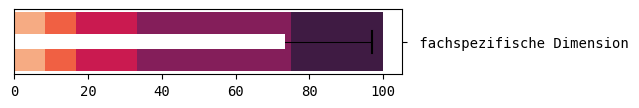

In [51]:
for key in data_dict.keys():
    counts = data_dict[key]["counts"][1]
    dimension_name = data_dict[key]["name"]
    mean = data_dict[key]["mean"]
    sd = data_dict[key]["std"]
    create_bullet_graph(counts, dimension_name, mean, sd)